Classification Report for FB Model:

              precision    recall  f1-score   support

      formal       0.52      0.62      0.57       931
    informal       0.53      0.74      0.62       952
     neutral       0.20      0.03      0.05       640

    accuracy                           0.52      2523
   macro avg       0.42      0.46      0.41      2523
weighted avg       0.44      0.52      0.45      2523

Confusion Matrix for FB Model:



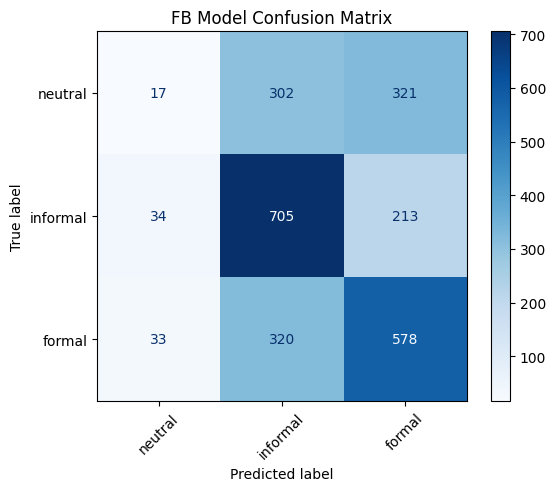

Classification Report for DeBERTa Model:

              precision    recall  f1-score   support

      formal       0.46      0.98      0.63       931
    informal       0.81      0.36      0.49       952
     neutral       0.35      0.07      0.12       640

    accuracy                           0.51      2523
   macro avg       0.54      0.47      0.42      2523
weighted avg       0.56      0.51      0.45      2523

Confusion Matrix for DeBERTa Model:



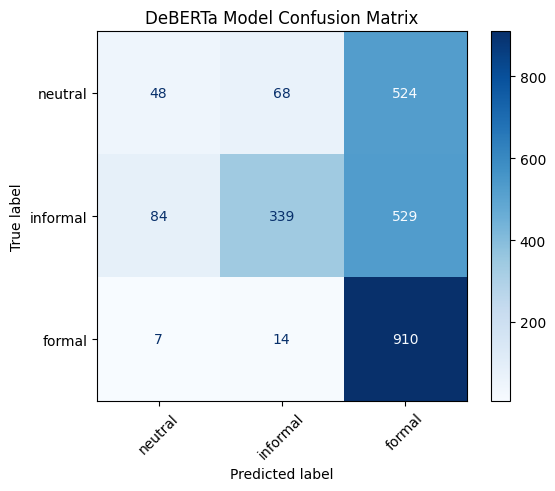

Classification Report for RoBERTa Model:

              precision    recall  f1-score   support

      formal       0.65      0.91      0.76       931
    informal       0.88      0.45      0.59       952
     neutral       0.51      0.58      0.54       640

    accuracy                           0.65      2523
   macro avg       0.68      0.65      0.63      2523
weighted avg       0.70      0.65      0.64      2523

Confusion Matrix for RoBERTa Model:



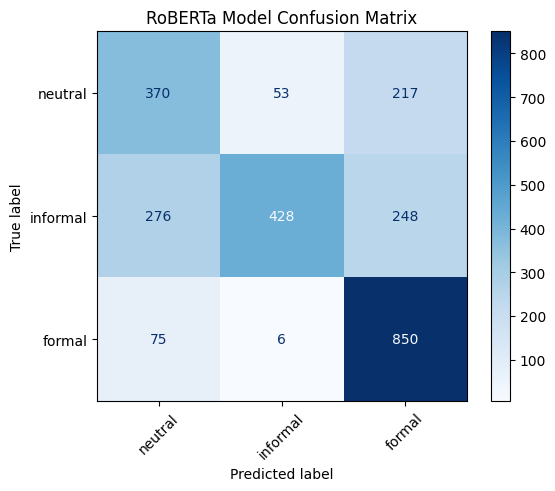

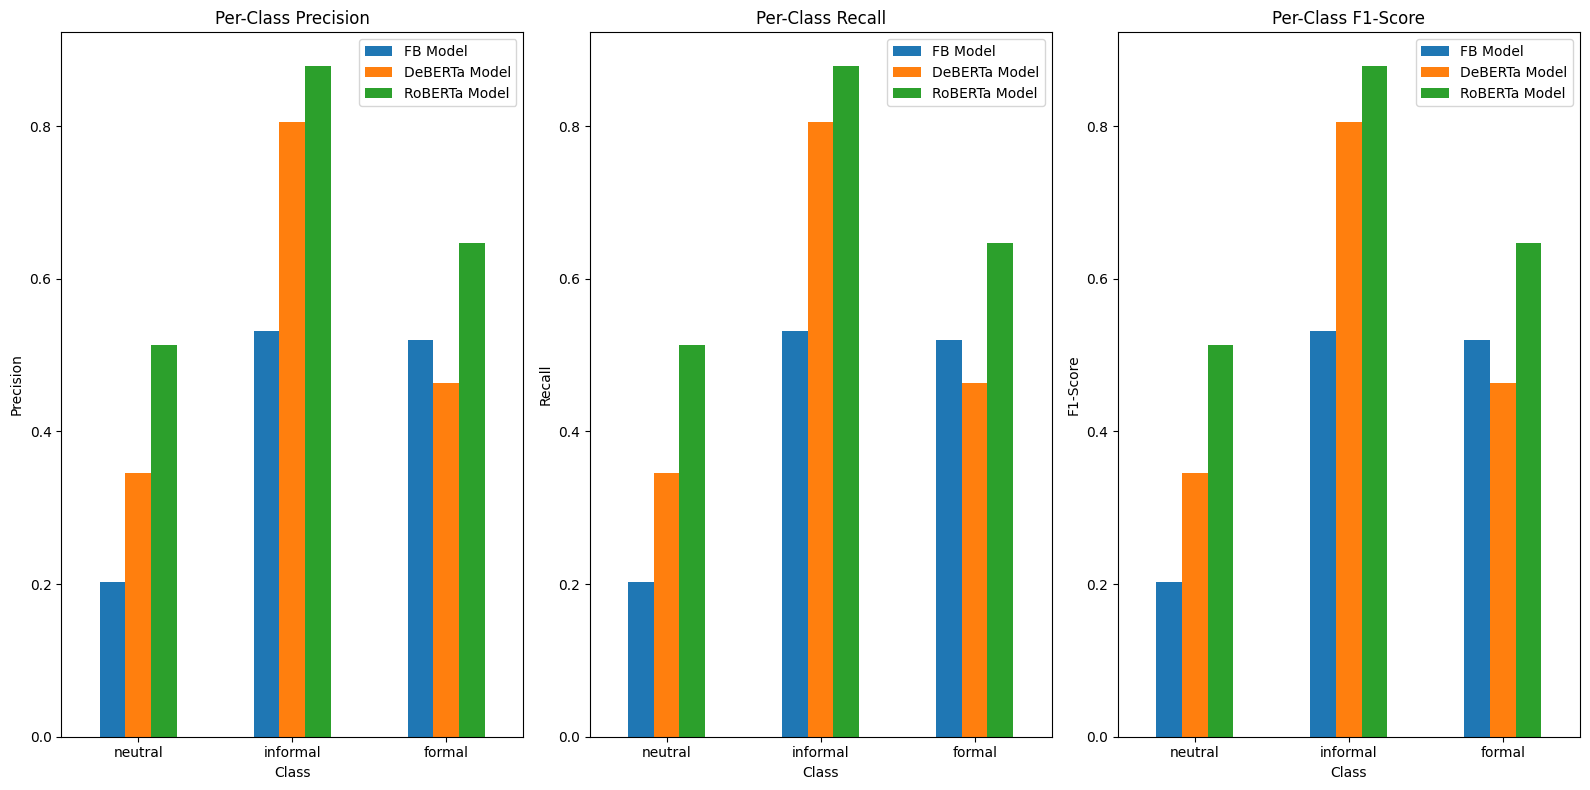


Aggregate Model Metrics:

FB Model:
  Accuracy: 0.52
  Avg_precision: 0.42
  Avg_recall: 0.46
  Avg_f1-score: 0.41

DeBERTa Model:
  Accuracy: 0.51
  Avg_precision: 0.54
  Avg_recall: 0.47
  Avg_f1-score: 0.42

RoBERTa Model:
  Accuracy: 0.65
  Avg_precision: 0.68
  Avg_recall: 0.65
  Avg_f1-score: 0.63


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("with_predictions.csv")
ground_truth = data["formality_label"]

def evaluate_model(predictions, labels, model_name):
    print(f"Classification Report for {model_name}:\n")
    report = classification_report(labels, predictions)
    print(report)

    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(labels, predictions, labels=["neutral", "informal", "formal"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["neutral", "informal", "formal"])
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    metrics = precision_recall_fscore_support(labels, predictions, labels=["neutral", "informal", "formal"])

    return {
        "precision": metrics[0],
        "recall": metrics[1],
        "f1-score": metrics[2],
        "support": metrics[3],
    }

metrics_results = {}
for model_name, column in zip(["FB Model", "DeBERTa Model", "RoBERTa Model"],
                              ["fb_class", "deberta_class", "roberta_class"]):
    metrics_results[model_name] = evaluate_model(data[column], ground_truth, model_name)

plt.figure(figsize=(16, 8))
for i, (metric_name, idx) in enumerate([("Precision", 0), ("Recall", 1), ("F1-Score", 2)]):
    plt.subplot(1, 3, i + 1)
    metric_data = {model: metrics_results[model]["precision"] for model in metrics_results}
    metric_df = pd.DataFrame(metric_data, index=["neutral", "informal", "formal"])
    metric_df.plot(kind="bar", ax=plt.gca(), rot=0, title=f"Per-Class {metric_name}")
    plt.xlabel("Class")
    plt.ylabel(metric_name)

plt.tight_layout()
plt.show()

aggregate_metrics = {model: {
    "accuracy": (data[column] == ground_truth).mean(),
    "avg_precision": metrics_results[model]["precision"].mean(),
    "avg_recall": metrics_results[model]["recall"].mean(),
    "avg_f1-score": metrics_results[model]["f1-score"].mean(),
} for model, column in zip(metrics_results.keys(), ["fb_class", "deberta_class", "roberta_class"])}

print("\nAggregate Model Metrics:")
for model, metrics in aggregate_metrics.items():
    print(f"\n{model}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name.capitalize()}: {value:.2f}")